Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [1]:
library(tidymodels)



Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.6     ✔ recipes      1.1.0
✔ dials        1.3.0     ✔ rsample      1.2.1
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.5.1     ✔ tidyr        1.3.1
✔ infer        1.0.7     ✔ tune         1.2.1
✔ modeldata    1.4.0     ✔ workflows    1.1.4
✔ parsnip      1.2.1     ✔ workflowsets 1.1.0
✔ purrr        1.0.2     ✔ yardstick    1.3.1

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Use suppressPackageStartupMessages() to eliminate package startup messages



The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [2]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [3]:
glimpse(diabetes_train) 



Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 1, 5, 4, 1, 3, 8, 13, 5, 5, 3, 10, 4, 3, 7…
$ Glucose                  <dbl> 85, 89, 116, 110, 103, 126, 99, 145, 117, 109…
$ BloodPressure            <dbl> 66, 66, 74, 92, 30, 88, 84, 82, 92, 75, 58, 7…
$ SkinThickness            <dbl> 29, 23, 0, 0, 38, 41, 0, 19, 0, 26, 11, 31, 3…
$ Insulin                  <dbl> 0, 94, 0, 0, 83, 235, 0, 110, 0, 0, 54, 0, 19…
$ BMI                      <dbl> 26.6, 28.1, 25.6, 37.6, 43.3, 39.3, 35.4, 22.…
$ DiabetesPedigreeFunction <dbl> 0.351, 0.167, 0.201, 0.191, 0.183, 0.704, 0.3…
$ Age                      <dbl> 31, 21, 30, 30, 33, 27, 50, 57, 38, 60, 22, 4…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:**

The Outcome variable. The values have to be boolean 1 or 0

❓ Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     |Plasma glucose concentration a 2 hours in an oral glucose tolerance test             |
| BMI         |Body mass index (weight in kg/(height in m)^2)             |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

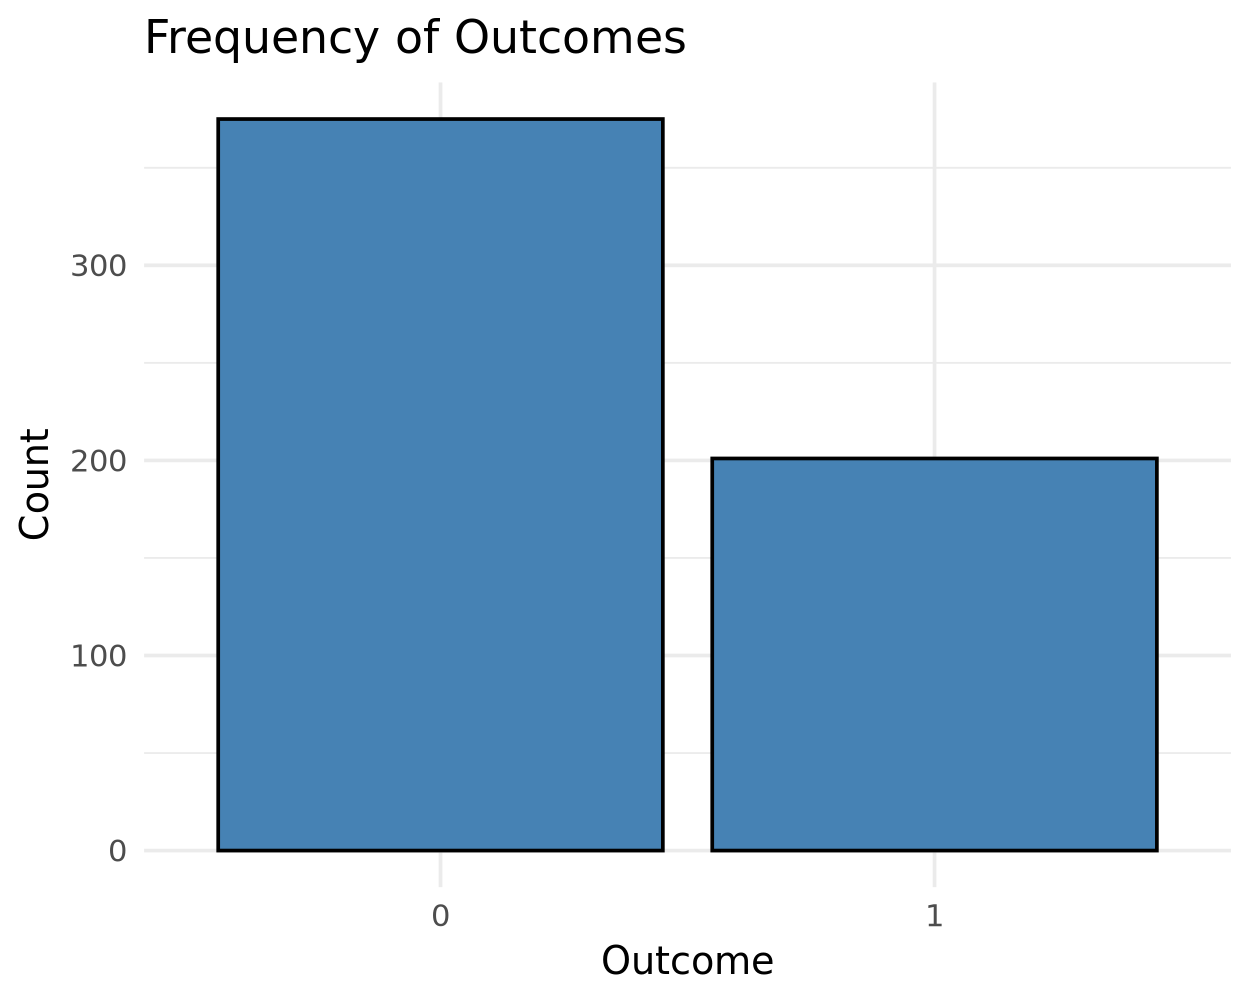

In [4]:
ggplot(data = diabetes_train, aes(x = Outcome)) +
  geom_bar(fill = "steelblue", color = "black") +
  labs(title = "Frequency of Outcomes", x = "Outcome", y = "Count") +
  theme_minimal()

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**

The data is not balanced because there are significantly more zeros than ones



Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [5]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,85.0
0,BMI,26.6
0,Glucose,89.0
0,BMI,28.1
0,Glucose,116.0
0,BMI,25.6


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

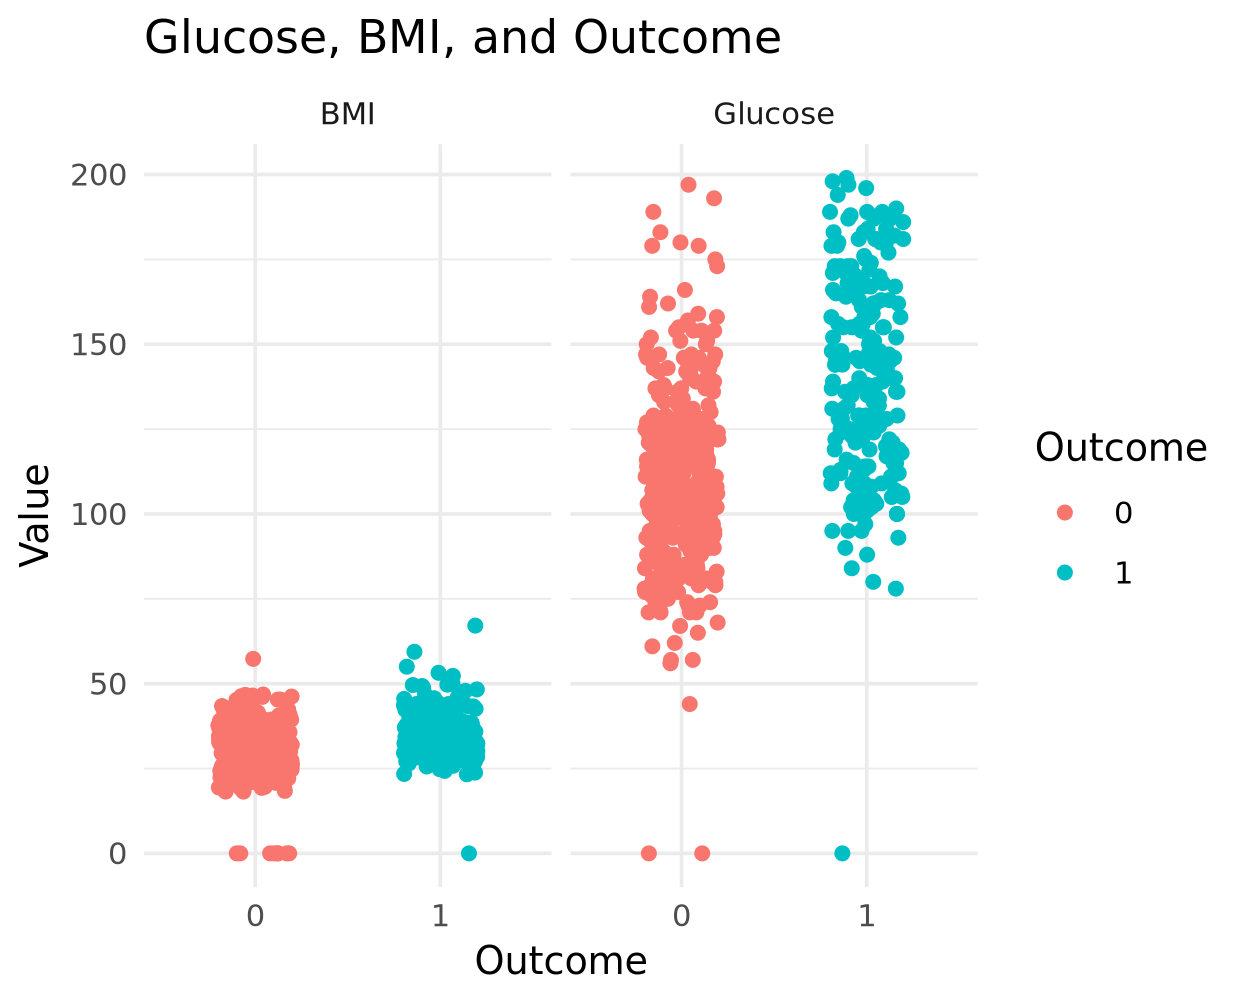

In [6]:
ggplot(data = plot_df, aes(x = Outcome, y = value)) +
  geom_jitter(aes(color = Outcome), width = 0.2, height = 0) + 
  facet_wrap(~name, ncol = 2, scales = 'free_x') +
  labs(title = "Glucose, BMI, and Outcome",
       x = "Outcome", 
       y = "Value") +
  theme_minimal()



❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:** No real change, just come changes to the tightness of the ends of each plot area. 

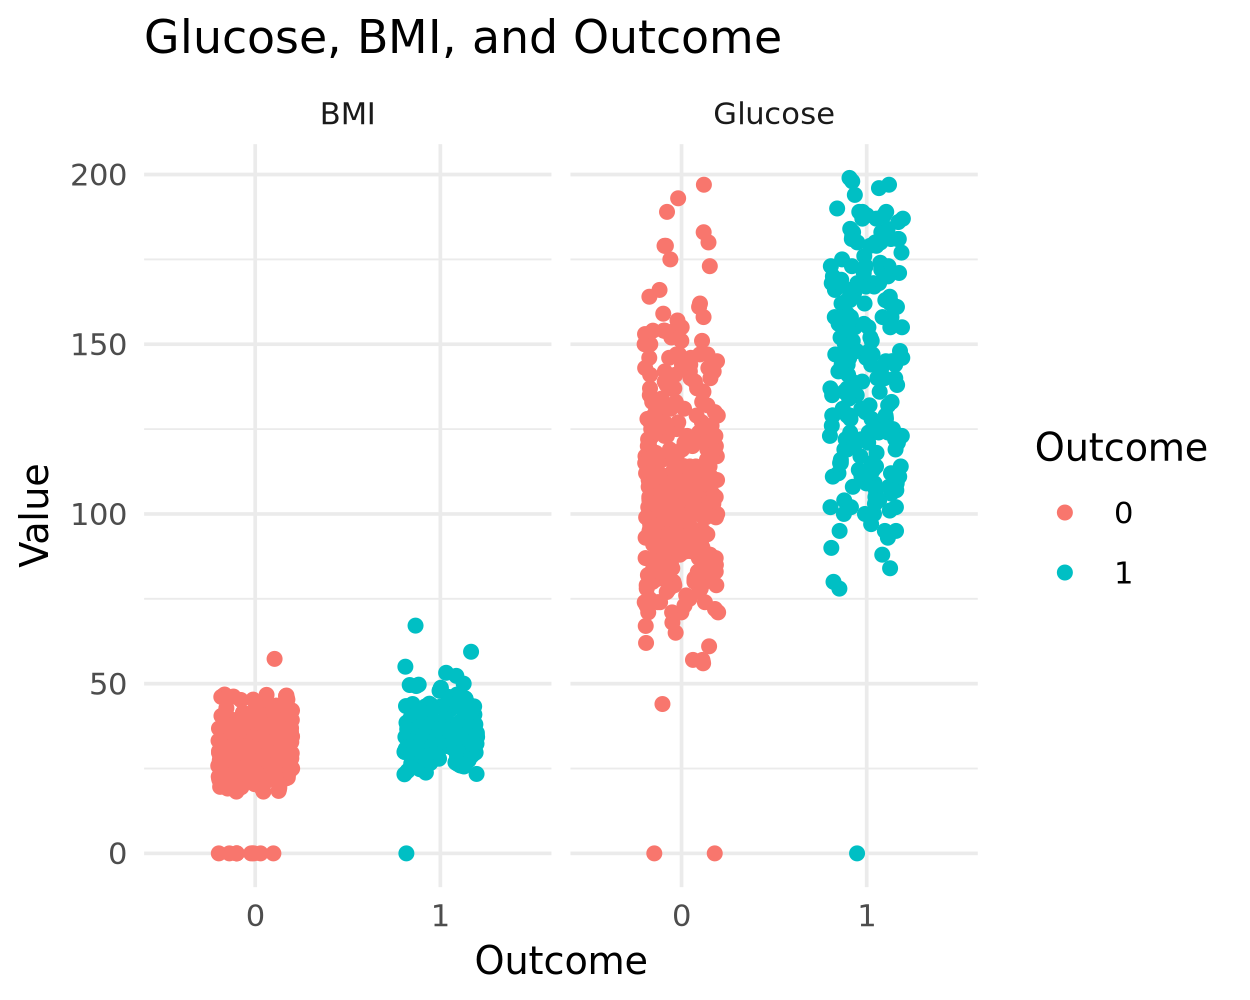

In [7]:
ggplot(data = plot_df, aes(x = Outcome, y = value)) +
  geom_jitter(aes(color = Outcome), width = 0.2, height = 0) + 
  facet_wrap(~name, ncol = 2) +
  labs(title = "Glucose, BMI, and Outcome",
       x = "Outcome", 
       y = "Value") +
  theme_minimal()

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [11]:
mod_fit <- glm(Outcome ~ BMI + Glucose, 
                      data = diabetes_train, 
                      family = binomial)



Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [14]:
library(broom)
diabetes_test_wPred <- augment(mod_fit, newdata = diabetes_test)


# Create predicted class (0 or 1) based on the predicted probabilities in the .fitted column
diabetes_test_wPred <- diabetes_test_wPred %>%
  mutate(.pred_class = ifelse(.fitted > 0.5, 1, 0))
head(diabetes_test_wPred)

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,.fitted,.pred_class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
10,115,0,0,0,35.3,0.134,29,0,-0.7596285,0
2,197,70,45,543,30.5,0.158,53,1,1.8670464,1
8,125,96,0,0,0.0,0.232,54,1,-3.5698528,0
10,139,80,0,0,27.1,1.441,57,0,-0.6036267,0
0,118,84,47,230,45.8,0.551,31,1,0.2991912,0
7,196,90,0,0,39.8,0.451,41,1,2.6684049,1


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [19]:
#Augment test data with predicited probablities
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)

#.pred_class to factor due to error I was getting 
diabetes_test_wPred <- diabetes_test_wPred %>%
  mutate(.pred_class = factor(ifelse(.fitted > 0.5, 1, 0)))

# Create the confusion matrix
library(yardstick)
diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 355 110
         1  20  91

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:**
-There are 576 individuals in the test data set
-91 indiviudals were corrected predicted to have diabetes
-20 individuals were predicted to have diabetes but did not

